In [26]:
import opstrat as op
import matplotlib.pyplot as plt

In [86]:
import math
from scipy.stats import norm

class EuropeanOption:
    def __init__(self, asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate, option_type):
        self.asset_price = asset_price
        self.asset_volatility = asset_volatility
        self.strike_price = strike_price
        self.time_to_expiration = time_to_expiration
        self.risk_free_rate = risk_free_rate
        self.option_type = option_type  # 'call' or 'put'
        self.price = self.calculate_option_price()
    
    def calculate_option_price(self):
        b = math.exp(-self.risk_free_rate * self.time_to_expiration)
        d1 = (math.log(self.asset_price / (self.strike_price * b)) + 0.5 * (self.asset_volatility ** 2) * self.time_to_expiration) / (self.asset_volatility * math.sqrt(self.time_to_expiration))
        d2 = d1 - self.asset_volatility * math.sqrt(self.time_to_expiration)
        
        if self.option_type == 'call':
            option_price = self.asset_price * norm.cdf(d1) - self.strike_price * b * norm.cdf(d2)
        elif self.option_type == 'put':
            option_price = self.strike_price * b * norm.cdf(-d2) - self.asset_price * norm.cdf(-d1)
        else:
            raise ValueError("Option type must be 'call' or 'put'")
        
        return option_price
    
    def calculate_delta(self):
        b = math.exp(-self.risk_free_rate * self.time_to_expiration)
        d1 = (math.log(self.asset_price / (self.strike_price * b)) + 0.5 * (self.asset_volatility ** 2) * self.time_to_expiration) / (self.asset_volatility * math.sqrt(self.time_to_expiration))
        
        if self.option_type == 'call':
            delta = norm.cdf(d1)
        elif self.option_type == 'put':
            delta = norm.cdf(d1) - 1
        else:
            raise ValueError("Option type must be 'call' or 'put'")
        
        return delta

    def calculate_gamma(self):
        b = math.exp(-self.risk_free_rate * self.time_to_expiration)
        d1 = (math.log(self.asset_price / (self.strike_price * b)) + 0.5 * (self.asset_volatility ** 2) * self.time_to_expiration) / (self.asset_volatility * math.sqrt(self.time_to_expiration))
        gamma = norm.pdf(d1) / (self.asset_price * self.asset_volatility * math.sqrt(self.time_to_expiration))
        return gamma
    
    def calculate_vega(self):
        b = math.exp(-self.risk_free_rate * self.time_to_expiration)
        d1 = (math.log(self.asset_price / (self.strike_price * b)) + 0.5 * (self.asset_volatility ** 2) * self.time_to_expiration) / (self.asset_volatility * math.sqrt(self.time_to_expiration))
        vega = self.asset_price * norm.pdf(d1) * math.sqrt(self.time_to_expiration) / 100
        return vega




In [99]:
asset_price = 543 # underlying

# input BS
sigma = 0.53
T = 30/365
rf = .015

no_of_Contracts = 1
strike_price= 500


option=EuropeanOption(asset_price=asset_price,
               asset_volatility=sigma,
               strike_price=strike_price,
               time_to_expiration=T,
               risk_free_rate=rf,
               option_type='call')
print(f'Price of Call Option is {option.calculate_option_price()}')
print(f'Delta of Call Option is {option.calculate_delta()}')
print(f'Gamma of Call Option is {option.calculate_gamma()}')
print(f'Vega of Call Option is {option.calculate_vega()}')


Price of Call Option is 58.03372559786385
Delta of Call Option is 0.7346868140323699
Gamma of Call Option is 0.003972278057493687
Vega of Call Option is 0.5102036489393398


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parameters
asset_price = 100
asset_volatility = 0.2
time_to_expiration = 1
risk_free_rate = 0.05
strike_prices = np.linspace(80, 120, 41)  # Strike prices ranging from 80 to 120

#dictionary of delta,vega,gamma values
price_call=[]
price_put=[]
delta_call=[]
delta_put=[]
gamma_call=[]
gamma_put=[]
vega_call=[]
vega_put=[]

for strike_price in strike_prices:
    call=EuropeanOption(asset_price=asset_price,
               asset_volatility=sigma,
               strike_price=strike_price,
               time_to_expiration=T,
               risk_free_rate=rf,
               option_type='call')
    put=EuropeanOption(asset_price=asset_price,
               asset_volatility=sigma,
               strike_price=strike_price,
               time_to_expiration=T,
               risk_free_rate=rf,
               option_type='put')
    price_call.append(call.calculate_option_price())
    delta_call.append(call.calculate_delta())
    gamma_call.append(call.calculate_gamma())
    vega_call.append(call.calculate_vega())


    price_put.append(put.calculate_option_price())
    delta_put.append(put.calculate_delta())
    gamma_put.append(put.calculate_gamma())
    vega_put.append(put.calculate_vega())
    




In [101]:
option_chain=pd.DataFrame([price_call,delta_call,gamma_call,vega_call,price_put,delta_put,gamma_put,vega_put]).transpose()
option_chain.columns=['price_call','delta_call','gamma_call','vega_call','price_put','delta_put','gamma_put','vega_put']
option_chain.set_index(strike_prices)


,price_call,delta_call,gamma_call,vega_call,price_put,delta_put,gamma_put,vega_put
80.0,20.517388,0.939747,0.007866,0.034264,0.418819,-0.060253,0.007866,0.034264
81.0,19.605528,0.929341,0.008900,0.038772,0.505727,-0.070659,0.008900,0.038772
82.0,18.707235,0.917758,0.009990,0.043520,0.606202,-0.082242,0.009990,0.043520
83.0,17.823800,0.904965,0.011127,0.048469,0.721534,-0.095035,0.011127,0.048469
84.0,16.956515,0.890942,0.012299,0.053576,0.853017,-0.109058,0.012299,0.053576
85.0,16.106658,0.875682,0.013496,0.058791,1.001928,-0.124318,0.013496,0.058791
86.0,15.275476,0.859191,0.014706,0.064061,1.169514,-0.140809,0.014706,0.064061
87.0,14.464173,0.841492,0.015915,0.069329,1.356979,-0.158508,0.015915,0.069329
88.0,13.673891,0.822619,0.017111,0.074537,1.565465,-0.177381,0.017111,0.074537
89.0,12.905696,0.802623,0.018279,0.079626,1.796038,-0.197377,0.018279,0.079626


<Axes: >

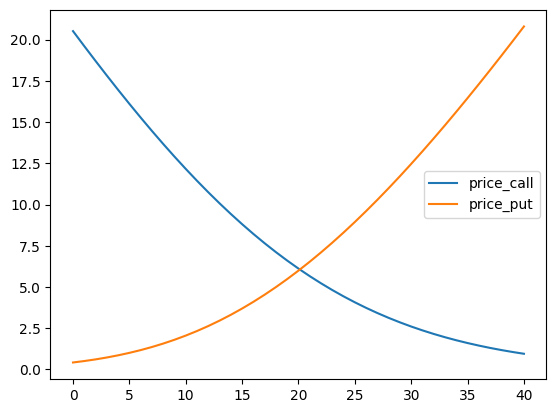

In [102]:
option_chain[['price_call','price_put']].plot()

<Axes: >

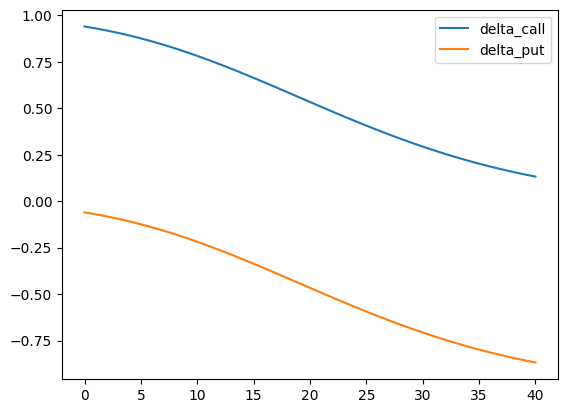

In [103]:
option_chain[['delta_call','delta_put']].plot()

<Axes: >

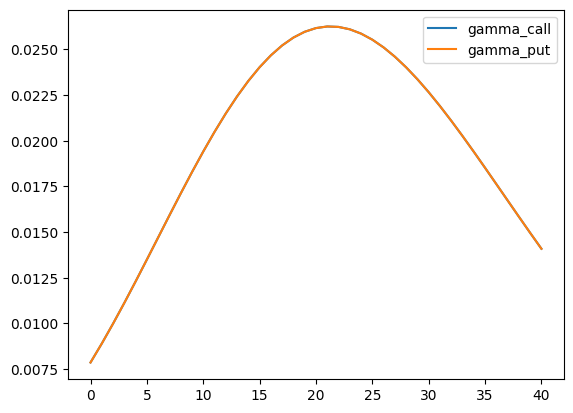

In [104]:
option_chain[['gamma_call','gamma_put']].plot()

In [120]:
# Hedging Portfolio 


# underlying
asset_price = 543

# input BS
sigma = 0.53
dt = 30/365
rf = .015

# option 1
no_of_Contracts_1 = 100
K1 = 545

# option 2
K2 = 550

# option 3
K3 = 570




In [121]:
# Portfolio position

option1 = EuropeanOption(asset_price=asset_price, 
                       asset_volatility=sigma, 
                       strike_price=K1, 
                       time_to_expiration=T,
                       risk_free_rate=rf,
                       option_type='call')

# theoretical value of the position
print('Theoretical Initial Portfolio value: ', str(option1.calculate_option_price() * abs(no_of_Contracts_1)))

# greeks
print('Initial Portfolio Greeks:\n '
      'Delta: {}\n '
      'Gamma: {}\n '
      'Vega: {}\n'.format(option1.calculate_delta() * no_of_Contracts,
                        option1.calculate_gamma() * no_of_Contracts,
                        option1.calculate_vega() * no_of_Contracts))

# We will use option2 and option 3 to hedge portfolio position of option 1 

option2 = EuropeanOption(asset_price=asset_price, 
                       asset_volatility=sigma, 
                       strike_price=K2, 
                       time_to_expiration=T,
                       risk_free_rate=rf,
                       option_type='call')

option3 = EuropeanOption(asset_price=asset_price, 
                       asset_volatility=sigma, 
                       strike_price=K3, 
                       time_to_expiration=T,
                       risk_free_rate=rf,
                       option_type='call')


print('Option2 Greeks:\n '
      'Delta: {}\n '
      'Gamma: {}\n '
      'Vega: {}\n'.format(option2.calculate_delta(),
                        option2.calculate_gamma(),
                        option2.calculate_vega()))

print('Option3 Greeks:\n '
      'Delta: {}\n '
      'Gamma: {}\n '
      'Vega: {}\n'.format(option3.calculate_delta(),
                        option3.calculate_gamma(),
                        option3.calculate_vega()))


Theoretical Initial Portfolio value:  3226.4053290347365
Initial Portfolio Greeks:
 Delta: 0.5238788365375873
 Gamma: 0.004826599629105528
 Vega: 0.6199336267745195

Option2 Greeks:
 Delta: 0.49991533666729754
 Gamma: 0.0048352636733539935
 Vega: 0.6210464458990014

Option3 Greeks:
 Delta: 0.4069946655584264
 Gamma: 0.00470326389122949
 Vega: 0.6040922524804238



### Greek neutralization

In [123]:
# greek neutralization -- gamma and vega
greeks = np.array([[option2.calculate_gamma(), option3.calculate_gamma()], [option2.calculate_vega(), option3.calculate_vega()]])
portfolio_greeks = [[option1.calculate_gamma() * abs(no_of_Contracts_1)], [option1.calculate_vega()* abs(no_of_Contracts_1)]]
inv = np.linalg.inv(np.round(greeks, 4))  # We need to round otherwise we can end up with a non-invertible matrix

# position on option 2 and 3 to be gamma and vega neutral
w = np.dot(inv, portfolio_greeks)

In [124]:
w

array([[-10.83485858],
       [113.75899662]])

In [125]:
# Greeks including delta
portfolio_greeks = [[option1.calculate_delta() * no_of_Contracts_1], [option1.calculate_gamma() * no_of_Contracts_1], [option1.calculate_vega() * no_of_Contracts_1]]
greeks = np.array([[option2.calculate_delta(), option3.calculate_delta()], [option2.calculate_gamma(), option3.calculate_gamma()], [option2.calculate_vega(), option3.calculate_vega()]])
w_stock = (np.round(np.dot(np.round(greeks, 4), w) + portfolio_greeks))[0]

In [126]:
w_stock

array([93.])

In [127]:
# final allocation
print('Final asset allocation: \n '
      'option1: {}\n '
      'option2: {}\n '
      'option3: {}\n '
      'underlying asset: {}'.format(no_of_Contracts_1,
                                    int(w[0]),
                                    int(w[1]),
                                    int(w_stock)))

Final asset allocation: 
 option1: 100
 option2: -10
 option3: 113
 underlying asset: 93
